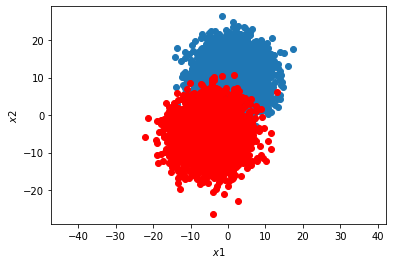

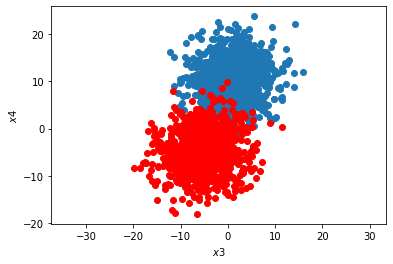

training error by using rbf kernel: 0.0393
testing error by using rbf kernel: 0.03400000000000003
training error by using linear kernel: 0.04090000000000005
testing error by using linear kernel: 0.034499999999999975


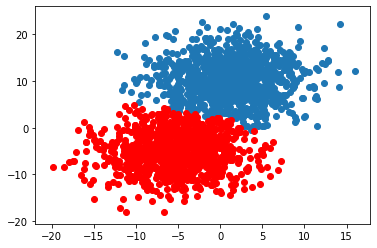

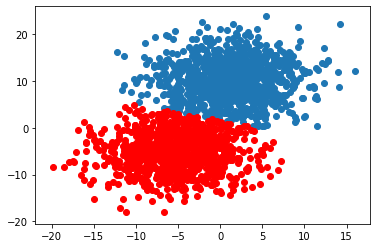

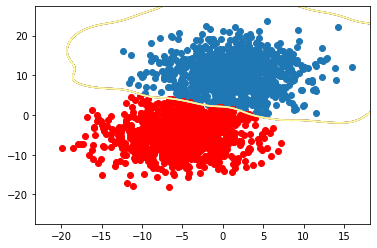

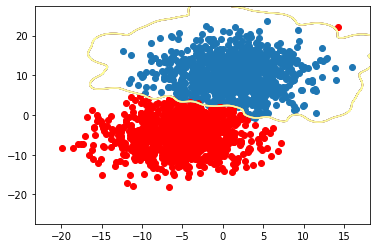

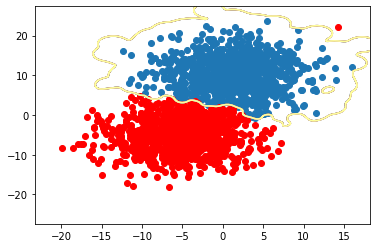

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

mean1 = [1, 10]
mean2 = [-5, -5]
cov = [[20, 1], [1, 20]]

#training data
x1 = np.random.multivariate_normal(mean1, cov, 5000)
x2 = np.random.multivariate_normal(mean2, cov, 5000)
xtr = np.vstack((x1,x2))
ytr = np.append(np.zeros((5000,1)), np.ones((5000,1)))
plt.plot(x1[:, 0], x1[:, 1], 'o')
plt.plot(x2[:, 0], x2[:, 1], 'o', c = 'r')
plt.axis('equal')
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.show()

#testing data
x3 = np.random.multivariate_normal(mean1, cov, 1000)
x4 = np.random.multivariate_normal(mean2, cov, 1000)
xts = np.vstack((x3,x4))
yts = np.append(np.zeros((1000,1)), np.ones((1000,1)))
plt.figure()
plt.plot(x3[:, 0], x3[:, 1], 'o')
plt.plot(x4[:, 0], x4[:, 1], 'o', c = 'r')
plt.axis('equal')
plt.xlabel('$x3$')
plt.ylabel('$x4$')
plt.show()

xtr = np.row_stack((x1,x2))
ytr = np.append(np.zeros((5000,1)), np.ones((5000,1)))
xts = np.row_stack((x3,x4))
yts = np.append(np.zeros((1000,1)), np.ones((1000,1)))
                   
#using rbf kernel
clf1 = SVC(gamma=0.3)
clf1.fit(xtr, ytr)
trerror1 = 1 - clf1.fit(xtr, ytr).score(xtr, ytr)
tserror1 = 1 - clf1.fit(xtr, ytr).score(xts, yts)
print ("training error by using rbf kernel:", trerror1)
print ("testing error by using rbf kernel:", tserror1)
pred1 = clf1.predict(xts)
plt.figure()
plt.scatter(xts[np.where(pred1==0)[0], 0], xts[np.where(pred1==0)[0], 1])
plt.scatter(xts[np.where(pred1==1)[0], 0], xts[np.where(pred1==1)[0], 1], c='r')

#using linear kernel
clf2 = SVC(kernel='linear')
clf2.fit(xtr, ytr)
trerror2 = 1 - clf2.fit(xtr, ytr).score(xtr, ytr)
tserror2 = 1 - clf2.fit(xtr, ytr).score(xts, yts)
print ("training error by using linear kernel:", trerror2)
print ("testing error by using linear kernel:", tserror2)
pred2 = clf2.predict(xts)
plt.figure()
plt.scatter(xts[np.where(pred2==0)[0], 0], xts[np.where(pred2==0)[0], 1])
plt.scatter(xts[np.where(pred2==1)[0], 0], xts[np.where(pred2==1)[0], 1], c='r')

#try different gamma in rbf kernel and visualize the decision boundaries
def decision_boundary(clf,pred):
    h = .02
    x_min, x_max = xtr[:, 0].min() - 1, xtr[:, 0].max() + 1
    y_min, y_max = xtr[:, 1].min() - 1, xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.scatter(xts[np.where(pred==0)[0], 0], xts[np.where(pred==0)[0], 1])
    plt.scatter(xts[np.where(pred==1)[0], 0], xts[np.where(pred==1)[0], 1], c='r')
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.show()

clf3 = SVC(gamma=0.1)
clf3.fit(xtr, ytr)
pred3 = clf3.predict(xts)
decision_boundary(clf3,pred3)

clf4 = SVC(gamma=0.5)
clf4.fit(xtr, ytr)
pred4 = clf4.predict(xts)
decision_boundary(clf4,pred4)

clf5 = SVC(gamma=1)
clf5.fit(xtr, ytr)
pred5 = clf5.predict(xts)
decision_boundary(clf5,pred5)


